# Polynomial Regression on Boston Housing Dataset


<b> 
In this notebook we do a comparative study of Linear Regression and Polynomial Regression accuracy on the Boston Housing Dataset
</b>

The description of all the features is given below:
CRIM: Per capita crime rate by town

ZN: Proportion of residential land zoned for lots over 25,000 sq. ft

INDUS: Proportion of non-retail business acres per town

CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

NOX: Nitric oxide concentration (parts per 10 million)

RM: Average number of rooms per dwelling

AGE: Proportion of owner-occupied units built prior to 1940

DIS: Weighted distances to five Boston employment centers

RAD: Index of accessibility to radial highways

TAX: Full-value property tax rate per $10,000

B: 1000(Bk - 0.63)², where Bk is the proportion of [people of African American descent] by town

LSTAT: Percentage of lower status of the population

MEDV: Median value of owner-occupied homes in $1000s

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.datasets import load_boston

boston = load_boston()

boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [4]:
data = pd.DataFrame(boston.data, columns=boston.feature_names)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [7]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [8]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [9]:
data.shape

(506, 13)

<b>The target values is missing from the data. Create a new column of target values and add it to dataframe</b>

In [11]:
# Data Preprocessing
boston['MEDV'] = boston.target

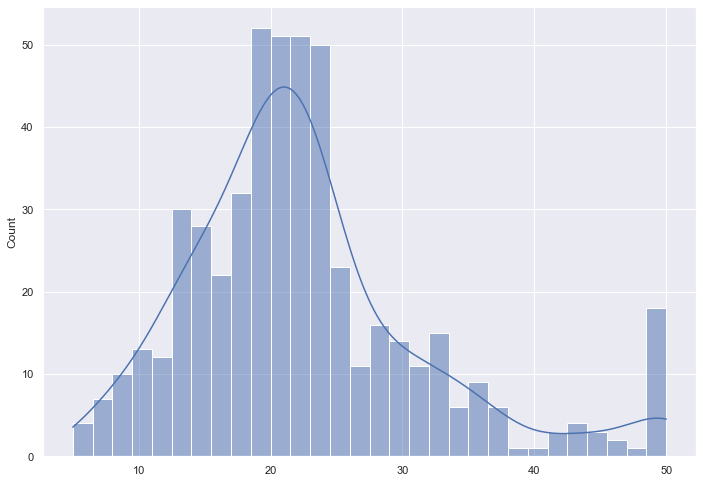

In [15]:
# Data visualisation

sns.set(rc={'figure.figsize':(11.7,8.27)})

# plot histograms showing the distributions of the target values

sns.histplot(boston['MEDV'], bins=30, kde = True)
plt.show()

In [16]:
# correlation matrix
# compute the pairwise correlation for all the columns

corr_matrix = data.corr().round(2)

<AxesSubplot:>

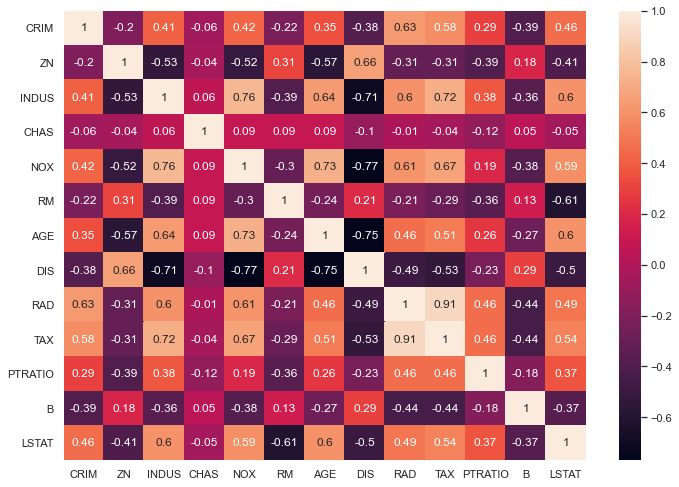

In [17]:
# using the heatmap to visualise the plot and correlation matrix

sns.heatmap(corr_matrix, annot=True)

<b> Observations</b>

From the above coorelation plot we can see that MEDV is strongly correlated to LSTAT, RM

RAD and TAX are stronly correlated, so we don't include this in our features together to avoid multi-colinearity
 

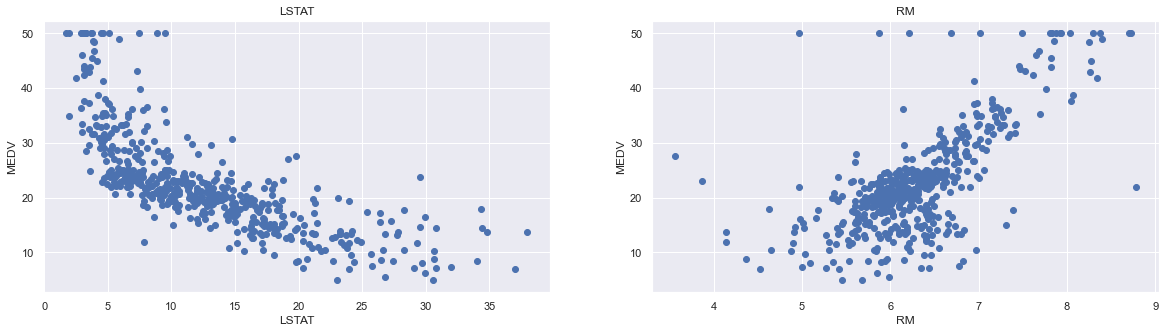

In [21]:
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = boston['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = data[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')


In [22]:
X = pd.DataFrame(np.c_[data['LSTAT'], data['RM']], columns = ['LSTAT',"RM"])
y = boston['MEDV']

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 2)
(102, 2)
(404,)
(102,)


# Linear Regression

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

LinearRegression()

In [27]:
# model evaluation for training set

y_train_predict = lin_model.predict(X_train)

rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))

r2 = r2_score(y_train, y_train_predict)

print('The model performance for training set')
print('--------------------------------------')
print(f'RMSE is : {rmse}')
print(f'R2 score is : {r2}')

# model evaluation for testing set

y_test_predict = lin_model.predict(X_test)

# root mean square error of the model
rmse1 = (np.sqrt(mean_squared_error(y_test, y_test_predict)))

# r-squared score of the model
r21 = r2_score(y_test, y_test_predict)

print('\nThe model performance on test set')
print('----------------------------------')
print(f'RMSE is : {rmse1}')
print(f'R2 score is : {r21}')

The model performance for training set
--------------------------------------
RMSE is : 5.6371293350711955
R2 score is : 0.6300745149331701

The model performance on test set
----------------------------------
RMSE is : 5.137400784702911
R2 score is : 0.6628996975186953


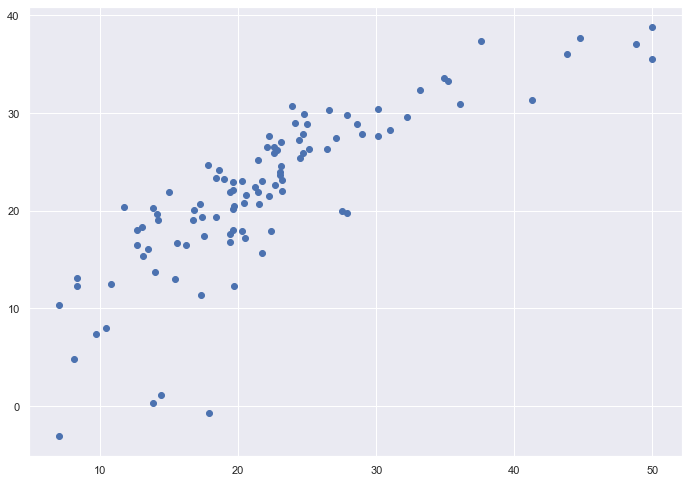

In [29]:
# plotting the y_test vs y_pred
# ideally should have been a straight line
plt.scatter(y_test, y_test_predict)
plt.show()


# Polynomial Regression

We can see that LSTAT doesn't vary exactly in a linear way. Let's apply the Polynomial Regression with degree 2 and test.

To generate the higher order degrees, we use PolyniomialFeatures class from sklearn library.

In [30]:
from sklearn.preprocessing import PolynomialFeatures

def create_polynomial_regression_model(degree):
    "Creates a polynomial regression model for the given degree"
    poly_features = PolynomialFeatures(degree=degree)
    
    # transform the features to higher degree features
    X_train_poly = poly_features.fit_transform(X_train)
    
    # fit the transformed features to Linear Regression
    poly_model = LinearRegression()
    poly_model.fit(X_train_poly, y_train)
    
    # predicting on training dataset
    y_train_predicted = poly_model.predict(X_train_poly)
    
    # predicting on test dataset
    y_test_predict = poly_model.predict(poly_features.fit_transform(X_test))
    
    # evaluating the model on training dataset
    
    rmse_train = np.sqrt(mean_squared_error(y_test, y_test_predict))
    r2_train = r2_score(y_train, y_train_predicted)
    
    # evaluating model on test dataset
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_predict))
    r2_test = r2_score(y_test, y_test_predict)
    
    print("The model performance for the training set")
    print("-------------------------------------------")
    print(f'RMSE of training set : {rmse_train}')
    print(f'R2 score of training set: {r2_train}')
    print('\n')
    
    print("The model performance for the training set")
    print("-------------------------------------------")
    print(f'RMSE of test set : {rmse_test}')
    print(f'R2 score of test set : {r2_test}')

In [33]:
create_polynomial_regression_model(5)

The model performance for the training set
-------------------------------------------
RMSE of training set : 3.856148372754031
R2 score of training set: 0.8022553678436463


The model performance for the training set
-------------------------------------------
RMSE of test set : 3.856148372754031
R2 score of test set : 0.8100760568002379
